# Chapter 3 첫 번째 GAN 구현하기
- 이 장에서는 다음 내용을 다룹니다.
- GAN과 합성곱 신경망의 차이점을 이해한다.
- 케라스로 GAN를 구현하고 훈련하여 손글씨 숫자를 생성한다. 




## 3.1 GAN기초 : 적대적 훈련
- 생성자와 판별자는 신경망과 같은 미분가능한 함수로 표한된다.
- 신경망은 각자 자신만의 비용 함수를 가진다.
- 판별자의 손실을 사용해 역전파로 두 네트워크를 훈련한다.
- 판벌자는 진짜와 가짜 샘플에 대한 손실을 최소화 하러고 노력한다.
- 반면 생성자는 자신이 생성한 가짜 샘플에 대해 판별자의 손실이 최대화 하도록 노력한다.

- 생성자(generator)는 흉내내려는 샘플의 종류는 훈랸 데이터셋으로 결정된다.
    - 예를 들어 실제와 같은 고양이 이미지를 만드는 것이 목적이라면 GAN에 고양이 이미지 데이터셋을 주입해야한다.
    - 즉, 생성자의 목적은 휸련 데이터셋의 데이터 분포를 흉내 내는 샘플을 생성하는 것이다.
    - 이미지는 행렬로 나타내고 이 이미지의 분포를 만들 수 있다.
    - 어떤 분포도 따르지 않는다면 이미지는 랜덤한 잡음과 같다.
    - 객체인식(Object recognition)모델은 이미지 콘텐츠를 이해하기 위해 이미지에 있는 패턴을 학습해야 한다.
    - 이런 작업의 역과정으로 생성자를 생각할 수 있다.
    - 패턴을 인식하는 것이 아니라 패턴을 합성하는 것을 학습한다.

### 3.1.1 비용함수(Cost function)
- $J^{(G)}$ : 생성자의 비용함수 , $J^{(D)}$ : 판별자의 비용 함수 , $\theta$ : 두 네트워크의 훈련 파라미터
- $\theta^{G}$ : 생상자의 파라미터 $\theta^{D}$ : 판별자의 파라미터
- GAN의 Cost function의 두가지의 파라미터에 의존한다. 즉 생성자의 비용함수 $J^{(G)}$($\theta^{G}$ ,$\theta^{D}$) 이고, 판별자의 비용함수는 $J^{(D)}$($\theta^{G}$ ,$\theta^{D}$) 이다.
- GAN에서 각 네트워크는 자신의 가중치와 절편만 튜닝할 수 있다. 즉 생성자는 $\theta^{G}$만, 훈련자는 $\theta^{D}$ 만 튜닝할 수 있다.
- 따라서 각 네트워크는 손실을 정의하는 것 중에 일부만을 제어한다.
- 비용함수는 상호작용 인자에 영향을 받는다.


### 3.1.2 훈련과정
- 생성자와 판별자는 자신의 파라미터만 튜닝하고 상대방의 파라미터는 튜닝할 수 없기 떄문에 GAN 훈련을 최적화보다 게임으로 더 잘 설명할 수 있다.
- 이 게임의 선수는 GAN의 두 네트워크이다.
- 즉 판별자와 생성나의 내시 균형에 도달할 때 GAN의 훈련이 끝난다.
- 이 지점은 게임에서 어느 선수도 전략을 바꾸어 현재 상황을 향상 할 수 없을때이다.
    - 생성자의 비용함수 $J^{(G)}$($\theta^{G}$ ,$\theta^{D}$)가 최소화가 되고, 판별자의 비용함수는 $J^{(D)}$($\theta^{G}$ ,$\theta^{D}$)가 최대화가 될때 제로섬(Zero-sum)게임 상태에서 내시 균형에 도달하게 된다.
    - 즉 말의 안장점(nodle point)에 도달하게 된다.
- 생성 분포를 근사하는 엄청난 복잡도나 GAN이 수렴하는 조건을 완벽하게 이해하지 못하는것이 GAN의 유용성이나 실제와 같은 샘플을 생성하는 능력과 관련이 없다.


### 3.2 생성자와 판별자
- 생성자(G)는 랜덤한 latent vector(z)를 받고 가짜 샘플 $x^{*}$을 생성한다. G(z) = $x^{*}$
- 판별자(D)는 실제 샘플 x 또는 가짜 샘플 $x^{*}$을 받는다.
- 각 입력에 대해 판별자는 진짜일 확률인 0과 1 사이값을 출력한다.

![gan_structure](./img_gan/3-1.png)

- 생성자 네트워크 G : 랜덤한 잡음 벡터 z(latent vector)를 가짜 샘플 $x^{*}$ 로변환한다. $G(z)=x^{*}$
- 판별자 네트워크 D : 입력한 샘플이 진짜인지 아닌지 분류결과를 출력한다.
- 진짜 샘플 x에 대해서는 판별자가 가능한 1에 가까운 값을 출력하기 위해 노력한다.
- 이와반대로 생성자는 D($x^{*}$)이 가능한 1에 가깝게 생성되기를 원한다. 즉, 판별자가 가짜 샘플을 진짜라고 잘못 분분류하기를 원한다.

### 3.2.1 상충되는 목적
- 판별자의 목적은 가능한 정확하게 구별한느것
- 진짜 샘플 x일 경우 D(x)는 가능한 1(양성 클래스의 레이블)과 가까워져야 한다.
- 가짜 샘플 $x^{*}$일 경우 D($x^{*}$)는 가능한 0(음성 클래스 레이블)과 가까워야 한다

- 생성자의 목표는 훈련세트에 있는 진짜 샘플과 구분하기 힘든 가짜 샘플 $x^{*}$을 만들어 판별자를 속여야 한다.
- D($x^{*}$)이 가능한 1 이 되도록 가짜 샘플 $x^{*}$을 만들어야 한다.


### 3.2.2 오차 행렬
- 판별자의 분류는 오차 행렬로 표현할 수 있다.
- 오차 행렬은 이진 분류의 모든 출력을 나타내는 표이다

- 진짜 양성(True positive) : 진짜로 분류한 진짜 샘플 D(x) = 1
- 거짓 음성(False netative) : 가짜로 분류한 진짜 샘플 D(x) = 0
- 진짜 음성(True Negative) : 가짜로 분류한 가짜 샘플 D($x^{*}$) = 0
- 거짓 양성(False Positive): 진짜로 분류한 가짜 샘플 D($x^{*}$) = 1

- 판별자는 진짜 양성과 진짜 음성 분류를 최대화하려고 노력한다.
- 같은 의미로 거짓 양성과 거짓 음성 분류를 최소화 한다.
- 반대로 생성자의 목적은 판별자의 거짓 양성 분류를 최대화하는 것이다.
- 거짓 양성은 판별자가 가짜 샘플을 진짜로 속이는 생성자의 샘플이다.
- 생성자는 판별자가 얼마나 진짜 샘플을 잘 분류하는지 관심이 없다.

## 3.3 GAN

> 단계 1 : 판별자 훈련
1. 랜점한 진짜 샘플의 미니배치 x를 받는다.
1. 랜덤한 잡음 벡터 z의 미니배치를 받고 가짜 샘플의 미니배치를 생성한다. G(z) = $x^{*}$
1. D(x)와 D($x^{*}$)에 대한 분류 손실을 계산하고 전체 오차를 역전파하여 분류 손실을 최소화 하도록 $\theta^{(D)}$를 업데이트 한다.

> 단계 2 : 생성자 훈련
1. 랜덤한 잡음 백터 z의 미니배치를 받고 가짜 샘플의 미니배치를 생성한다 G(x) = $x^{*}$
1. D($x^{*}$)에 대한 분류 손실을 계산하고 오차를 역전파하여 이 손실을 최대화 하도록 $\theta^{(G)}$를 업데이트 한다.

- 단계 1 에서 판별자 훈련하는 동안 생성자의 파라미터는 변경하지 않습니다.
- 단계 2 에서 생성자를 훈련하는 동안 판별자의 파라미터는 그대로 유지한다.
- 각 네트워크는 다른 네트워크의 업데이트에 간섭받지 않고 자신에게 관련된 신호만 업데이트에 적용한다.
- 이를 번걸아하는 게임이다.


In [1]:
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense,Flatten,Reshape
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [2]:
img_rows = 28
img_cols = 28
chennels = 1

img_shape = (img_rows,img_cols,chennels)

z_dim = 100

### 3.4.2 생성자 구현
- 간단하게 만들기위해서 생성자 네트워크 하나의 은닉층을 가진다.
- z벡터를 입려받아 이지미지를 생성한다
- LeakyReLU 활성화 함수를 사용한다.
- 음수 입력을 모두 0 으로 만드는 ReLU와 달리 LeakyReLU는 작은 기울기를 사용한다.
- 이 함수는 훈련중에 gradient가 사라지는 것을 막기 때문에 훈련 결과를 향상시키는 경향이 있다.
- 출력층에는 tanh 활성화 함수를 사용하여 출력 값을 [-1,1]범위로 조정한다.
- 일반적으로 0과1범위로 출력하는 시그모이드 함수보다 더 뚜렷한 이미지를 만들어 준다.

In [3]:
def build_generator(img_shape,z_dim):
    
    model = Sequential()

    model.add(Dense(128, input_dim = z_dim))
    model.add(LeakyReLU(alpha = 0.01))
    model.add(Dense(28*28*1, activation = 'tanh'))
    model.add(Reshape(img_shape))
    
    return model

In [4]:
def build_discriminator(img_shape):
    model = Sequential()

    model.add(Flatten(input_shape = img_shape))
    model.add(Dense(128))
    model.add(LeakyReLU(alpha = 0.01))
    model.add(Dense(1,activation='sigmoid'))
    
    return model

In [5]:
def build_gan(generator,discriminator):
    model = Sequential()

    model.add(generator) # 생성자와 판별자 모델 연결
    model.add(discriminator)

    return model

discriminator = build_discriminator(img_shape)
discriminator.compile(loss = 'binary_crossentropy',optimizer=Adam())

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-06-21 15:48:14.076256: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-21 15:48:14.076794: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [6]:
losses = []
accuracies = []
iteration_checkpoints = []


In [7]:
def train(iterations,batch_size,sample_interval):
    (X_train,_),(_,_) = mnist.load_data()
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train,axis=3)

    real = np.ones((batch_size, 1))
    
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        idx = np.random.randint(0,X_train.shape[0],batch_size)
        imgs = X_train[idx]

        z=np.random.normal(0,1,(batch_size,100))
        d_loss_real = discriminator.train_on_batch(imgs,real) # 가짜 이미지 생성
        d_loss_fake = discriminator.train_on_batch(gen_imgs,fake) # 판별자 생성
        d_loss,accuracy = 0.5 * np.add(d_loss_real,d_loss_fake)

        z = np.random.normal(0,1,(batch_size,100)) # 가짜이미지 배치생성
        gen_imgs = generator.predict(z)

        g_loss = gan.train_on_batch(z,real) # 생성자 훈련

        if (iteration + 1) % sample_interval == 0:
            losses.append((d_loss,g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            print("%d[D 손실 : %f, 정확도 : %.2f%%] [G 손실 : %f]" %(iteration + 1, d_loss, 100*accuracy,g_loss))

            sample_images(generator)
            


In [8]:
# 샘플 이미지 출력

def sample_images(generator, image_grid_rows = 4, image_grid_columns = 4):
    z= np.random.normal(0,1,(image_grid_rows*image_grid_columns,z_dim))

    gen_imgs = generator.predict(z)

    gen_imgs = 0.5*gen_imgs + 0.5

    fig,axs = plt.subplot(image_grid_rows,image_grid_columns,figsize = (4,4), sharey = True, sharex=True)

    cnt = 0

    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            axs[i,j].imshow(gen_imgs[cnt,:,:,0], cmap='gray')
            axs[i,j].axis('off')
            
            cnt+=1

In [9]:
iterations = 20000
batch_size = 128
sample_interval = 1000

train(iterations,batch_size,sample_interval)

2022-06-21 15:48:17.526346: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-21 15:48:17.527251: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


UnboundLocalError: local variable 'gen_imgs' referenced before assignment

2022-06-21 15:48:18.302073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-21 15:48:18.399263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-06-21 15:48:18.589284: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1000 [D 손실: 0.052004, 정확도: 99.22%] [G 손실: 4.281118]


2022-06-21 15:49:24.748170: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


2000 [D 손실: 0.112093, 정확도: 96.88%] [G 손실: 5.204207]
3000 [D 손실: 0.249317, 정확도: 91.02%] [G 손실: 3.226807]
4000 [D 손실: 0.333345, 정확도: 89.84%] [G 손실: 4.220213]
5000 [D 손실: 0.145580, 정확도: 94.14%] [G 손실: 4.767777]
6000 [D 손실: 0.078462, 정확도: 98.05%] [G 손실: 6.171350]
7000 [D 손실: 0.163588, 정확도: 94.92%] [G 손실: 4.339078]
8000 [D 손실: 0.085714, 정확도: 97.66%] [G 손실: 5.461232]
9000 [D 손실: 0.251117, 정확도: 90.62%] [G 손실: 4.610957]
10000 [D 손실: 0.274509, 정확도: 88.28%] [G 손실: 4.501134]
11000 [D 손실: 0.197110, 정확도: 91.02%] [G 손실: 4.453811]
12000 [D 손실: 0.541436, 정확도: 78.12%] [G 손실: 2.896571]
13000 [D 손실: 0.233925, 정확도: 90.62%] [G 손실: 2.913680]
14000 [D 손실: 0.323287, 정확도: 85.16%] [G 손실: 2.954701]
15000 [D 손실: 0.322626, 정확도: 84.38%] [G 손실: 3.338359]
16000 [D 손실: 0.341456, 정확도: 83.59%] [G 손실: 3.050458]
17000 [D 손실: 0.274960, 정확도: 87.50%] [G 손실: 3.021052]
18000 [D 손실: 0.432758, 정확도: 77.73%] [G 손실: 2.533170]
19000 [D 손실: 0.340074, 정확도: 83.98%] [G 손실: 2.820097]
20000 [D 손실: 0.262644, 정확도: 89.06%] [G 손실: 2.752303]


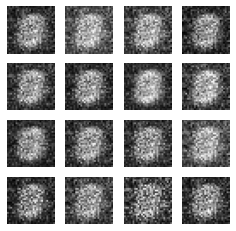

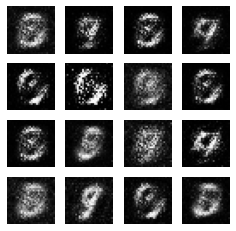

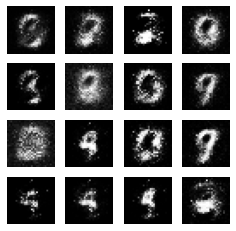

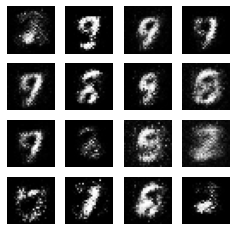

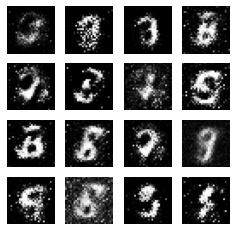

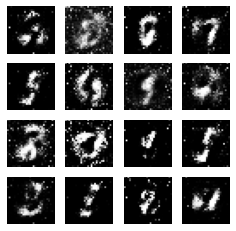

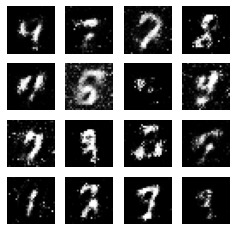

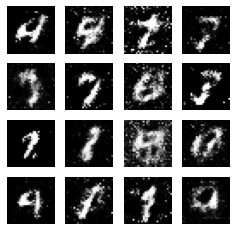

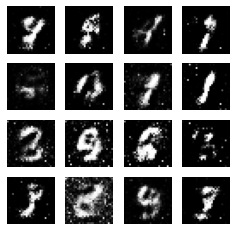

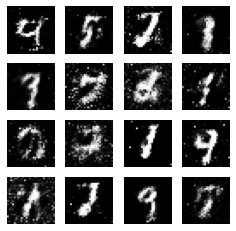

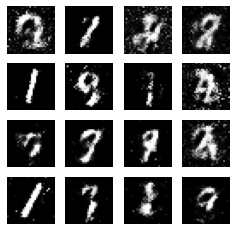

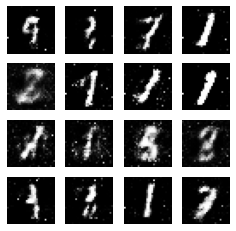

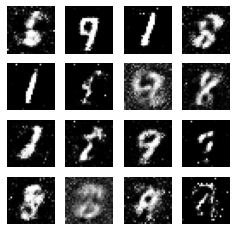

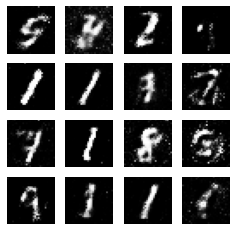

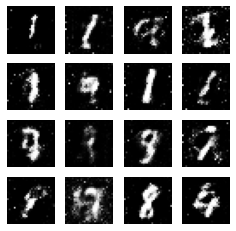

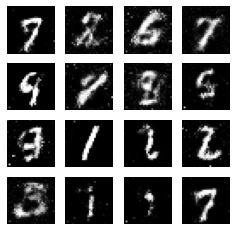

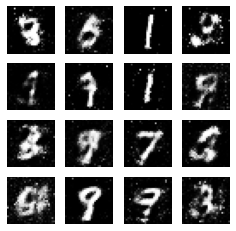

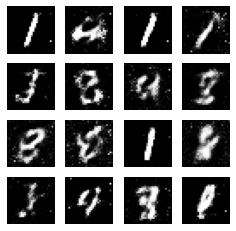

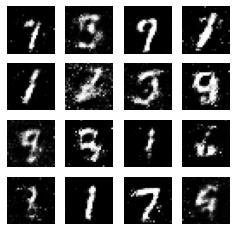

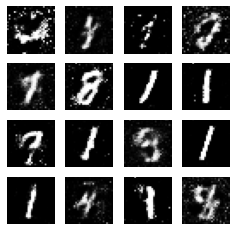

In [10]:
img_rows = 28
img_cols = 28
channels = 1

# 입력 이미지 차원
img_shape = (img_rows, img_cols, channels)

# 생성자 입력으로 사용될 잡음 벡터의 크기
z_dim = 100


def build_generator(img_shape, z_dim):
    
    model = Sequential()

    # 완전 연결층
    model.add(Dense(128, input_dim=z_dim))

    # LeakyReLU 활성화 함수
    model.add(LeakyReLU(alpha=0.01))

    # tanh 활성화 함수를 사용한 출력층
    model.add(Dense(28 * 28 * 1, activation='tanh'))

    # 생성자의 출력을 이미지 차원으로 변경
    model.add(Reshape(img_shape))

    return model


def build_discriminator(img_shape):
    
    model = Sequential()

    # 입력 이미지를 일렬로 펼치기
    model.add(Flatten(input_shape=img_shape))

    # 완전 연결층
    model.add(Dense(128))

    # LeakyReLU 활성화 함수
    model.add(LeakyReLU(alpha=0.01))

    # 시그모이드 활성화 함수를 사용한 출력층
    model.add(Dense(1, activation='sigmoid'))

    return model


def build_gan(generator, discriminator):
    
    model = Sequential()

    # 생성자 -> 판별자로 연결된 모델
    model.add(generator)
    model.add(discriminator)

    return model


# 판별자 모델을 만들고 컴파일하기
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy',
                      optimizer=Adam(),
                      metrics=['accuracy'])

# 생성자 모델 만들기
generator = build_generator(img_shape, z_dim)

# 생성자를 훈련하는 동안 판별자의 파라미터를 유지
discriminator.trainable = False

# 생성자를 훈련하기 위해 동결된 판별자로 GAN 모델을 만들고 컴파일
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam())

losses = []
accuracies = []
iteration_checkpoints = []


def train(iterations, batch_size, sample_interval):

    # MNIST 데이터셋 로드
    (X_train, _), (_, _) = mnist.load_data()

    # [0, 255] 흑백 픽셀 값을 [-1, 1] 사이로 스케일 조정
    X_train = X_train / 127.5 - 1.0
    X_train = np.expand_dims(X_train, axis=3)

    # 진짜 이미지 레이블: 모두 1
    real = np.ones((batch_size, 1))

    # 가짜 이미지 레이블: 모두 0
    fake = np.zeros((batch_size, 1))

    for iteration in range(iterations):

        # -------------------------
        #  판별자 훈련
        # -------------------------

        # 진짜 이미지에서 랜덤 배치 가져오기
        idx = np.random.randint(0, X_train.shape[0], batch_size)
        imgs = X_train[idx]

        # 가짜 이미지 배치 생성
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # 판별자 훈련
        d_loss_real = discriminator.train_on_batch(imgs, real)
        d_loss_fake = discriminator.train_on_batch(gen_imgs, fake)
        d_loss, accuracy = 0.5 * np.add(d_loss_real, d_loss_fake)

        # ---------------------
        #  생성자 훈련
        # ---------------------

        # 가짜 이미지 배치 생성
        z = np.random.normal(0, 1, (batch_size, 100))
        gen_imgs = generator.predict(z)

        # 생성자 훈련
        g_loss = gan.train_on_batch(z, real)

        if (iteration + 1) % sample_interval == 0:

            # 훈련이 끝난 후 그래프를 그리기 위해 손실과 정확도 저장
            losses.append((d_loss, g_loss))
            accuracies.append(100.0 * accuracy)
            iteration_checkpoints.append(iteration + 1)

            # 훈련 과정 출력
            print("%d [D 손실: %f, 정확도: %.2f%%] [G 손실: %f]" %
                  (iteration + 1, d_loss, 100.0 * accuracy, g_loss))

            # 생성된 이미지 샘플 출력
            sample_images(generator)

def sample_images(generator, image_grid_rows=4, image_grid_columns=4):
    
    # 랜덤한 잡음 샘플링
    z = np.random.normal(0, 1, (image_grid_rows * image_grid_columns, z_dim))

    # 랜덤한 잡음에서 이미지 생성하기
    gen_imgs = generator.predict(z)

    # 이미지 픽셀 값을 [0, 1] 사이로 스케일 조정
    gen_imgs = 0.5 * gen_imgs + 0.5

    # 이미지 그리드 설정
    fig, axs = plt.subplots(image_grid_rows,
                            image_grid_columns,
                            figsize=(4, 4),
                            sharey=True,
                            sharex=True)

    cnt = 0
    for i in range(image_grid_rows):
        for j in range(image_grid_columns):
            # 이미지 그리드 출력
            axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')
            axs[i, j].axis('off')
            cnt += 1



# 하이퍼파라미터 설정
iterations = 20000
batch_size = 128
sample_interval = 1000

# 지정된 반복 횟수만큼 GAN 훈련
train(iterations, batch_size, sample_interval)

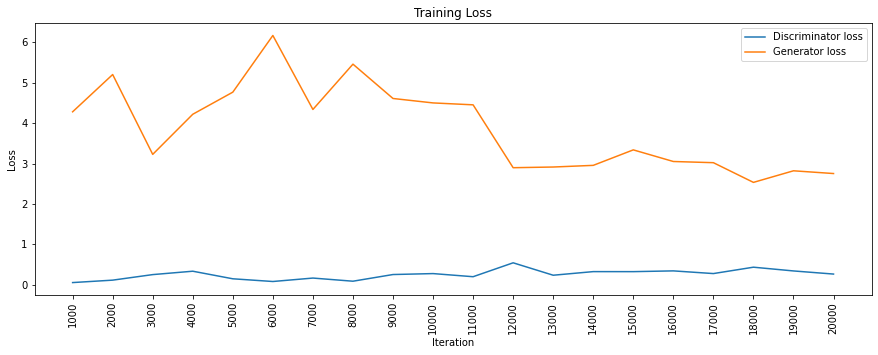

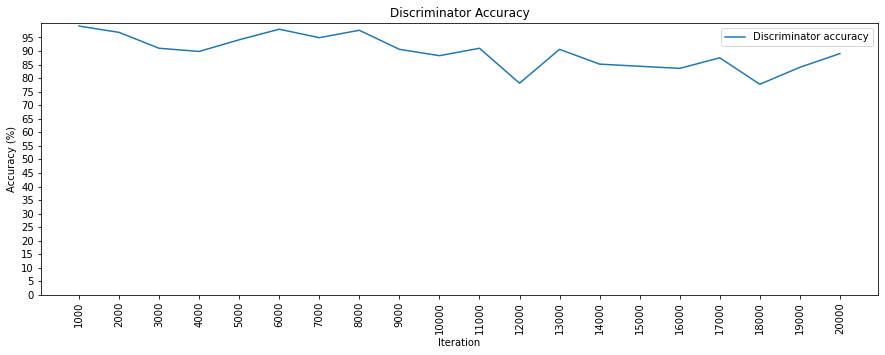

In [11]:
losses = np.array(losses)

# 판별자와 생성자의 훈련 손실 그래프
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, losses.T[0], label="Discriminator loss")
plt.plot(iteration_checkpoints, losses.T[1], label="Generator loss")

plt.xticks(iteration_checkpoints, rotation=90)

plt.title("Training Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()

accuracies = np.array(accuracies)

# 판별자의 정확도 그래프
plt.figure(figsize=(15, 5))
plt.plot(iteration_checkpoints, accuracies, label="Discriminator accuracy")

plt.xticks(iteration_checkpoints, rotation=90)
plt.yticks(range(0, 100, 5))

plt.title("Discriminator Accuracy")
plt.xlabel("Iteration")
plt.ylabel("Accuracy (%)")
plt.legend()